# Analysis of weather related features

Analysis of the group of features (weathersit, temp, atemp, hump and windspeed) representing the weather conditions. Expectation is to observe a strong dependency of those features on the current number of rides, as bad weather can significantly influence bike sharing services.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load hourly data
dataset = pd.read_csv(f"{data_path}/preprocessed_hour.csv")
dataset.head()

instant      dteday  season    yr  mnth  hr  holiday   weekday  workingday  \
0        1  2011-01-01  winter  2011     1   0        0  Saturday           0   
1        2  2011-01-01  winter  2011     1   1        0  Saturday           0   
2        3  2011-01-01  winter  2011     1   2        0  Saturday           0   
3        4  2011-01-01  winter  2011     1   3        0  Saturday           0   
4        5  2011-01-01  winter  2011     1   4        0  Saturday           0   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0      clear  0.24  0.2879  81.0        0.0       3          13   16  
1      clear  0.22  0.2727  80.0        0.0       8          32   40  
2      clear  0.22  0.2727  80.0        0.0       5          27   32  
3      clear  0.24  0.2879  75.0        0.0       3          10   13  
4      clear  0.24  0.2879  75.0        0.0       0           1    1

In [4]:
# print some generic statistics about the data
print(f"Shape of data: {dataset.shape}")
print(f"Number of missing values in the data: {dataset.isnull().sum().sum()}")

# get statistics on the numerical columns
dataset.describe().T

Shape of data: (17379, 17)
Number of missing values in the data: 0


count         mean          std      min        25%        50%  \
instant     17379.0  8690.000000  5017.029500     1.00  4345.5000  8690.0000   
yr          17379.0  2011.502561     0.500008  2011.00  2011.0000  2012.0000   
mnth        17379.0     6.537775     3.438776     1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405     0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165     0.00     0.0000     0.0000   
workingday  17379.0     0.682721     0.465431     0.00     0.0000     1.0000   
temp        17379.0     0.496987     0.192556     0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850     0.00     0.3333     0.4848   
hum         17379.0    62.722884    19.292983     0.00    48.0000    63.0000   
windspeed   17379.0    12.736540     8.196795     0.00     7.0015    12.9980   
casual      17379.0    35.676218    49.305030     0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286     0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599     1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
yr           2012.0000   2012.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
workingday      1.0000      1.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum            78.0000    100.0000  
windspeed      16.9979     56.9969  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

<a id="plots"></a>
## Correlation plots

In [5]:
def plot_correlations(data, columns):
    # Correlation between col and registered rides
    corr_r = np.corrcoef(data[columns], data["registered"])[0, 1]
    sns.regplot(
        x=columns,
        y="registered",
        data=data,
        scatter_kws={"alpha": 0.05},
        label=f"Registered rides (correlation: {corr_r:.3f})",
    )

    # Correlation between col and casual rides
    corr_c = np.corrcoef(data[columns], data["casual"])[0, 1]
    ax = sns.regplot(
        x=columns,
        y="casual",
        data=data,
        scatter_kws={"alpha": 0.05},
        label=f"Casual rides (correlation: {corr_c:.3f})",
    )

    # Adjusting legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)

    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {columns}")
    return ax

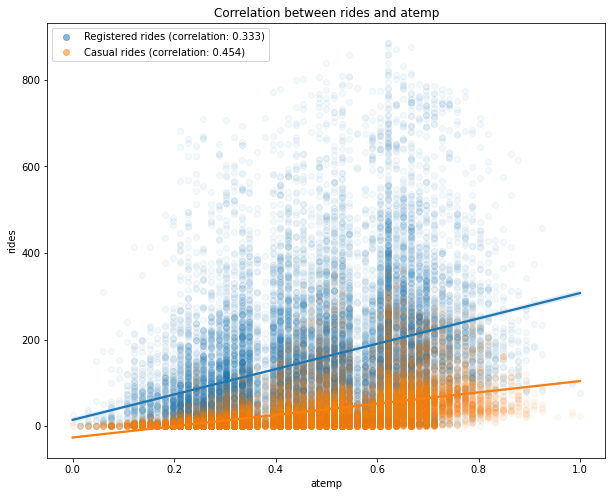

In [6]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(dataset, "atemp")
plt.savefig(f"{assets_path}/correlation_atemp.png", format="png")

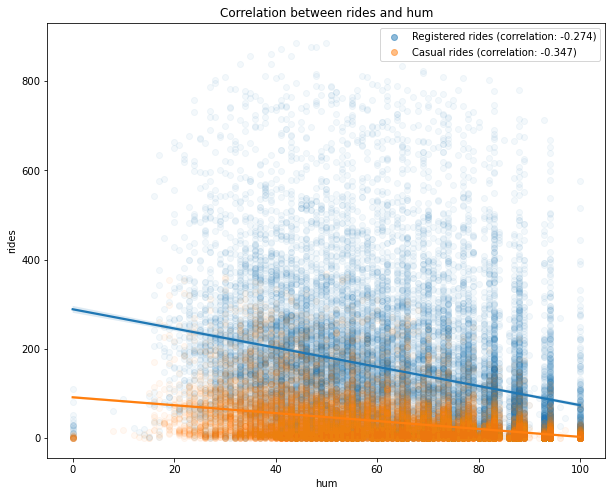

In [7]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(dataset, "hum")
plt.savefig(f"{assets_path}/correlation_hum.png", format="png")

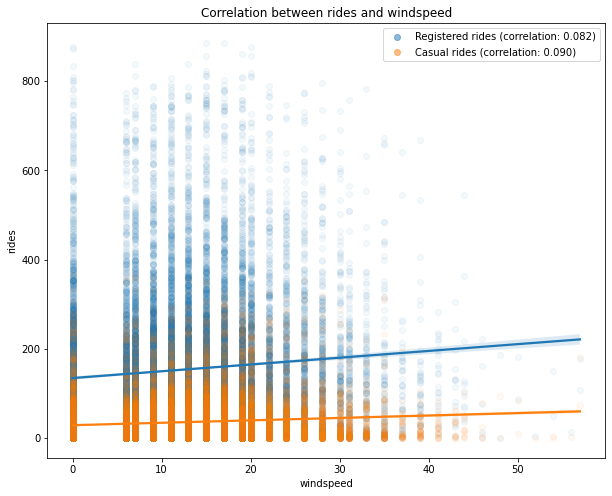

In [8]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(dataset, "windspeed")
plt.savefig(f"{assets_path}/correlation_windspeed.png", format="png")

<a id="pearson-spearman"></a>
## The difference between the Pearson and Spearman correlations

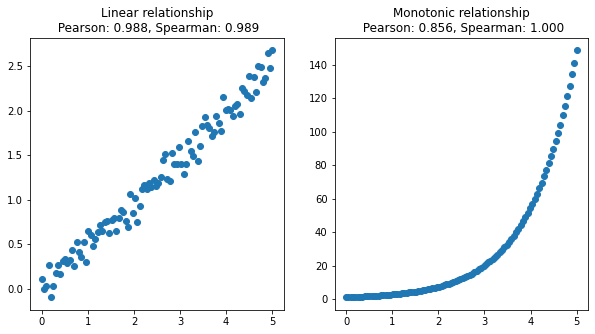

In [9]:
# Random variables
x = np.linspace(0, 5, 100)
y_lin = 0.5 * x + 0.1 * np.random.randn(100)
y_mon = np.exp(x) + 0.1 * np.random.randn(100)

# Correlations
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

# Visualizing variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x, y_lin)
ax1.set_title(
    f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, "
    f"Spearman: {corr_lin_spearman:.3f}"
)
ax2.scatter(x, y_mon)
ax2.set_title(
    f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, "
    f"Spearman: {corr_mon_spearman:.3f}"
)
fig.savefig(f"{assets_path}/pearson_spearman.png", format="png")

In [10]:
# Function for computing correlations
def compute_correlations(data, columns):
    pearson_reg = pearsonr(data[columns], data["registered"])[0]
    pearson_cas = pearsonr(data[columns], data["casual"])[0]
    spearman_reg = spearmanr(data[columns], data["registered"])[0]
    spearman_cas = spearmanr(data[columns], data["casual"])[0]

    return pd.Series(
        {
            "Pearson (registered)": pearson_reg,
            "Spearman (registered)": spearman_reg,
            "Pearson (casual)": pearson_cas,
            "Spearman (casual)": spearman_cas,
        }
    )


# Correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(
    index=[
        "Pearson (registered)",
        "Spearman (registered)",
        "Pearson (casual)",
        "Spearman (casual)",
    ]
)

for col in cols:
    corr_data[col] = compute_correlations(dataset, col)

corr_data.T

Pearson (registered)  Spearman (registered)  Pearson (casual)  \
temp                   0.335361               0.373196          0.459616   
atemp                  0.332559               0.373014          0.454080   
hum                   -0.273933              -0.338480         -0.347028   
windspeed              0.082321               0.122936          0.090287   

           Spearman (casual)  
temp                0.570989  
atemp               0.570419  
hum                -0.388213  
windspeed           0.122920

<a id="correlation-matrix"></a>
## Correlation matrix

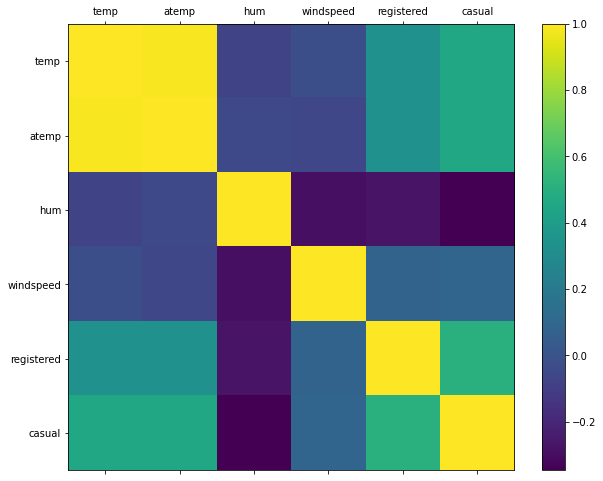

In [11]:
# Plotting correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = dataset[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
fig.savefig(f"{assets_path}/correlation_matrix.png", format="png")